# 9 IASI - Level 2 - Carbon Monoxide (CO)

The [Infrared Atmospheric Sounding Interferometer (IASI)](https://www.eumetsat.int/iasi) is an instrument onboard the Metop-B/C satellites. It provides information on the vertical structure of temperature and humidity as well as main atmospheric species.

IASI data are distributed via:
- the [EUMETSAT data centre (Earth Observation Portal)](https://eoportal.eumetsat.int/), and
- external services, e.g. [AERIS](https://www.aeris-data.fr/).

IASI Level 2 data are disseminated in `BUFR` originally. AERIS implemented the [IASI portal](https://iasi.aeris-data.fr/), which provides the data in `netCDF`. This notebooks shows you how you can load, browse and visualize Carbon Monoxide data from the IASI instrument.

#### This module has the following outline:
* [1 - Load and browse Metop-B/C IASI Level 2 data](#load)
* [2 - Mask Metop-B/C IASI Level 2 data](#masking)
* [3 - Combine Metop-B/CIASI Level 2 data](#combine)
* [4 - Bin Metop-B/C IASI Level 2 data](#binning)
* [5 - Visualize Metop-B/C IASI Level 2 data](#visualize)

#### Load required libraries

In [1]:
import sys
!{sys.executable} -m pip install cartopy netCDF4 h5netcdf==1.3.0 satpy==0.51.0 pyhdf h5py python-geotiepoints

In [2]:
import xarray as xr
import pandas as pd

import os
os.environ['PROJ_LIB'] = '/opt/conda/share/proj'

import matplotlib.pyplot as plt
from matplotlib.axes import Axes
import matplotlib.colors

from datetime import datetime

import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.mpl.geoaxes import GeoAxes
GeoAxes._pcolormesh_patched = Axes.pcolormesh

#### Load helper functions

In [3]:
if os.path.exists("functions.ipynb"):
    %run functions.ipynb
elif os.path.exists("../functions.ipynb"):
    %run ../functions.ipynb
else:
    print("Helper functions notebook not found in any specified path. Downloading from Gitlab.")    
    !wget https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/raw/master/functions.ipynb
    %run functions.ipynb

In [4]:
if os.path.exists("bucket_functions.ipynb"):
    %run bucket_functions.ipynb
elif os.path.exists("../bucket_functions.ipynb"):
    %run ../bucket_functions.ipynb
else:
    print("Helper functions notebook not found in any specified path. Downloading from Gitlab.")    
    !wget https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/raw/master/90_workshops/202410_wmo_school/bucket_functions.ipynb
    %run bucket_functions.ipynb

In [5]:
base_url = 'https://s3.waw3-2.cloudferro.com/swift/v1/wmo/'
all_paths_list = list_data_on_bucket(base_url)

all_directories_list = [os.path.dirname(path) for path in all_paths_list if path.count('/') <= 4]
# Take unique directories
all_directories_list = list(np.unique(all_directories_list))
all_directories_list

Status ok



[np.str_('eodata'),
 np.str_('eodata/fci'),
 np.str_('eodata/fci/W_XX-EUMETSAT-Darmstadt,IMG+SAT,MTI1+FCI-1C-RRAD-FDHSI-FD--x-x---x_C_EUMT_20240924092245_IDPFI_OPE_20240924092007_20240924092928_N__C_0057_0000'),
 np.str_('eodata/gome2'),
 np.str_('eodata/gome2/aai'),
 np.str_('eodata/gome2/hcho'),
 np.str_('eodata/gome2/hcho/daily'),
 np.str_('eodata/gome2/no2'),
 np.str_('eodata/gome2/no2/daily'),
 np.str_('eodata/iasi'),
 np.str_('eodata/iasi/co'),
 np.str_('eodata/iasi/nh3'),
 np.str_('eodata/meteosat'),
 np.str_('eodata/meteosat/2020'),
 np.str_('eodata/meteosat/2024'),
 np.str_('eodata/modis'),
 np.str_('eodata/modis/10km'),
 np.str_('eodata/modis/level_1b'),
 np.str_('eodata/monarch'),
 np.str_('eodata/pmap'),
 np.str_('eodata/s3'),
 np.str_('eodata/s3/aod'),
 np.str_('eodata/s3/aod/S3A_SL_2_AOD____20240821T082340_20240821T082839_20240821T101507_0299_116_078______MAR_O_NR_003.SEN3'),
 np.str_('eodata/s3/aod/S3A_SL_2_AOD____20240825T081954_20240825T082453_20240825T101112_0299_116_

#### Set geographical extent

In [6]:
latmin = -40
latmax = 10
lonmin = 0
lonmax = 40

<hr>

## <a id="load"></a>Load and browse Metop-B/C IASI Level 2 products

IASI Level 2 Carbon Monoxide (CO) data from the [IASI portal](https://iasi.aeris-data.fr/) are disseminated in the `netCDF` format You can use the Python library [xarray](https://docs.xarray.dev/en/stable/) to access and manipulate datasets in `netCDF` format.

### <a id='step1'></a>Load the Metop-B IASI Level 2 data with `xarray`

IASI Total Column Carbon Monoxide data are disseminated in `.netCDF` format. You can easily load the .netCDF file with the xarrray function `xr.open_dataset()`.

In [7]:
iasi_file = 'eodata/iasi/co/IASI_METOPB_L2_CO_20240821_ULB-LATMOS_V6.7.0.nc'
data_path = base_url+iasi_file
iasi_co = open_data_from_bucket(data_path)
iasi_co

/opt/miniconda3/envs/cwcc/lib/python3.11/site-packages/xarray/namedarray/core.py:261: UserWarning: Duplicate dimension names present: dimensions {'nlayers'} appear more than once in dims=('time', 'nlayers', 'nlayers'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
/opt/miniconda3/envs/cwcc/lib/python3.11/site-packages/xarray/namedarray/core.py:261: UserWarning: Duplicate dimension names present: dimensions {'nlayers'} appear more than once in dims=('time', 'nlayers', 'nlayers'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become disti

File opened: https://s3.waw3-2.cloudferro.com/swift/v1/wmo/eodata/iasi/co/IASI_METOPB_L2_CO_20240821_ULB-LATMOS_V6.7.0.nc


<xarray.Dataset> Size: 1GB
Dimensions:                            (time: 572033, nlayers: 19,
                                        npressures: 20)
Coordinates:
  * time                               (time) float64 5MB 5.566e+08 ... 5.567...
Dimensions without coordinates: nlayers, npressures
Data variables: (12/21)
    time_string                        (time) |S16 9MB ...
    time_in_day                        (time) float64 5MB ...
    latitude                           (time) float32 2MB ...
    longitude                          (time) float32 2MB ...
    solar_zenith_angle                 (time) float32 2MB ...
    satellite_zenith_angle             (time) float32 2MB ...
    ...                                 ...
    CO_total_column                    (time) float32 2MB ...
    CO_total_column_error              (time) float32 2MB ...
    CO_degrees_of_freedom              (time) float32 2MB ...
    air_partial_column_profile         (time, nlayers) float32 43MB ...
    atmosphere_pressure_grid           (time, npressures) float32 46MB ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 826MB ...
Attributes: (12/31)
    title:                       IASI/METOPB ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.7.0
    history:                     2024-08-22 06:26:12 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    ...                          ...
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/
    time_coverage_start:         20240821T000000Z
    time_coverage_end:           20240821T235959Z

#### Load data into a xarray with the function `generate_xr_from_1D_vec`

You can use the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) to load the `Total Column Carbon Monoxide` information into a `xarray.DataArray`. 

The data holds a `Super Quality Flag`, which should be masked out. You can load the flag information into a `xarray.DataArray` as well, by repeating the same procedure.

In [8]:
iasi_co_da = generate_xr_from_1D_vec(file=iasi_co,
                                     lat_path='latitude', 
                                     lon_path='longitude', 
                                     variable=iasi_co['CO_total_column'], 
                                     parameter_name='co', 
                                     longname='IASI Carbon Monoxide Total Column', 
                                     no_of_dims=1, 
                                     unit='molec./cm-2')

iasi_co_da

<xarray.DataArray 'co' (ground_pixel: 572033)> Size: 2MB
array([0.02965961, 0.02862673, 0.0293623 , ..., 0.03872369, 0.03918036,
       0.04433408], shape=(572033,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 2MB -13.88 -13.62 -13.71 ... 62.82 62.94
    longitude  (ground_pixel) float32 2MB -47.18 -47.23 -47.73 ... -41.76 -39.62
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

In [9]:
iasi_co_qf_da = generate_xr_from_1D_vec(file=iasi_co,
                                        lat_path='latitude', 
                                        lon_path='longitude',
                                        variable=iasi_co['retrieval_quality_flag'], 
                                        parameter_name='qf', 
                                        longname='Super Quality Flag', 
                                        no_of_dims=1, 
                                        unit='-')

iasi_co_qf_da

<xarray.DataArray 'qf' (ground_pixel: 572033)> Size: 2MB
array([2, 2, 2, ..., 2, 2, 1], shape=(572033,), dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 2MB -13.88 -13.62 -13.71 ... 62.82 62.94
    longitude  (ground_pixel) float32 2MB -47.18 -47.23 -47.73 ... -41.76 -39.62
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Super Quality Flag
    units:      -

#### Mask the Total Column Carbon Monoxide data with the `Super Quality Flag`

The function [generate_masked_array](../functions.ipynb#generate_masked_array) allows you to flag out the quality flags. You want to flag all pixels with a quality flag equals 2.

In [10]:
iasi_co_masked = generate_masked_array(xarray=iasi_co_da,
                                       mask=iasi_co_qf_da,
                                       threshold=2,
                                       operator='=')
iasi_co_masked

<xarray.DataArray (ground_pixel: 397122)> Size: 2MB
array([0.02965961, 0.02862673, 0.0293623 , ..., 0.04213341, 0.03872369,
       0.03918036], shape=(397122,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 2MB -13.88 -13.62 -13.71 ... 63.05 62.82
    longitude  (ground_pixel) float32 2MB -47.18 -47.23 -47.73 ... -41.81 -41.76
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

#### Load the Metop-C IASI Level 2 data with `xarray`

Let us now use `xarray` to load the data from Metop-C. We will repeat the same steps as we did for Metop-B.

In [11]:
data_path = base_url+'eodata/iasi/co/IASI_METOPC_L2_CO_20240821_ULB-LATMOS_V6.7.0.nc'
iasi_co_b = open_data_from_bucket(data_path)
iasi_co_b

File opened: https://s3.waw3-2.cloudferro.com/swift/v1/wmo/eodata/iasi/co/IASI_METOPC_L2_CO_20240821_ULB-LATMOS_V6.7.0.nc


/opt/miniconda3/envs/cwcc/lib/python3.11/site-packages/xarray/namedarray/core.py:261: UserWarning: Duplicate dimension names present: dimensions {'nlayers'} appear more than once in dims=('time', 'nlayers', 'nlayers'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become distinct, as most xarray functionality is likely to fail silently if you do not. To rename the dimensions you will need to set the ``.dims`` attribute of each variable, ``e.g. var.dims=('x0', 'x1')``.
  self._dims = self._parse_dimensions(dims)
/opt/miniconda3/envs/cwcc/lib/python3.11/site-packages/xarray/namedarray/core.py:261: UserWarning: Duplicate dimension names present: dimensions {'nlayers'} appear more than once in dims=('time', 'nlayers', 'nlayers'). We do not yet support duplicate dimension names, but we do allow initial construction of the object. We recommend you rename the dims immediately to become disti

<xarray.Dataset> Size: 1GB
Dimensions:                            (time: 557120, nlayers: 19,
                                        npressures: 20)
Coordinates:
  * time                               (time) float64 4MB 5.566e+08 ... 5.567...
Dimensions without coordinates: nlayers, npressures
Data variables: (12/21)
    time_string                        (time) |S16 9MB ...
    time_in_day                        (time) float64 4MB ...
    latitude                           (time) float32 2MB ...
    longitude                          (time) float32 2MB ...
    solar_zenith_angle                 (time) float32 2MB ...
    satellite_zenith_angle             (time) float32 2MB ...
    ...                                 ...
    CO_total_column                    (time) float32 2MB ...
    CO_total_column_error              (time) float32 2MB ...
    CO_degrees_of_freedom              (time) float32 2MB ...
    air_partial_column_profile         (time, nlayers) float32 42MB ...
    atmosphere_pressure_grid           (time, npressures) float32 45MB ...
    averaging_kernel_matrix            (time, nlayers, nlayers) float32 804MB ...
Attributes: (12/31)
    title:                       IASI/METOPC ULB-LATMOS carbon monoxide (CO) ...
    institution:                 ULB-LATMOS for algorithm development ; EUMET...
    product_version:             6.7.0
    history:                     2024-08-22 06:30:50 (date of data extraction...
    summary:                     This dataset contains Level 2 carbon monoxid...
    source:                      EUMETSAT IASI Level 2 carbon monoxide (CO) d...
    ...                          ...
    creator_type:                institution
    creator_name:                ULB-LATMOS
    contact_email:               contact form at http://iasi.aeris-data.fr/co...
    data_policy:                 see https://iasi.aeris-data.fr/data-use-policy/
    time_coverage_start:         20240821T000000Z
    time_coverage_end:           20240821T235959Z

#### Load data into a xarray with the function `generate_xr_from_1D_vec`

The IASI Carbon Monoxide data are stored in column 20 of the data file. You can use the function [generate_xr_from_1D_vec](../functions.ipynb#generate_xr_from_1D_vec) to load the `Total Column Carbon Monoxide` information into a `xarray.DataArray`. Here again, as the function is based on an xarray / numpy structure, you have to first convert the pandas dataframe into a xarray.Dataset with the function `to_xarray()`.

The data holds a `Super Quality Flag`, which should be masked out. The quality flag is stored in column 15. You can load the flag information into a `xarray.DataArray` as well, by following the same procedure.

In [12]:
iasi_co_b_da = generate_xr_from_1D_vec(file=iasi_co_b,
                                     lat_path='latitude', 
                                     lon_path='longitude', 
                                     variable=iasi_co_b['CO_total_column'], 
                                     parameter_name='co', 
                                     longname='IASI Carbon Monoxide Total Column', 
                                     no_of_dims=1, 
                                     unit='molec./cm-2')

iasi_co_b_da

<xarray.DataArray 'co' (ground_pixel: 557120)> Size: 2MB
array([0.02898142, 0.02744375, 0.0289132 , ..., 0.01955002, 0.01980096,
       0.02081592], shape=(557120,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 2MB 20.76 20.51 20.37 ... -47.8 -47.48
    longitude  (ground_pixel) float32 2MB 155.7 155.6 156.1 ... 119.9 118.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

Subset the larger array to match the size of the smaller one to avoid errors in dimension mismatch (this can happen sometimes)

In [13]:
min_size = min(len(iasi_co_b['latitude']), len(iasi_co_b['longitude']), len(iasi_co['retrieval_quality_flag']))

# Subset all arrays to the minimum size
latitude = iasi_co_b['latitude'][:min_size]
longitude = iasi_co_b['longitude'][:min_size]
retrieval_quality_flag = iasi_co['retrieval_quality_flag'][:min_size]

In [14]:
iasi_co_b_qf_da = generate_xr_from_1D_vec(file=iasi_co_b,
                                        lat_path='latitude', 
                                        lon_path='longitude',
                                        variable=retrieval_quality_flag, 
                                        parameter_name='qf', 
                                        longname='Super Quality Flag', 
                                        no_of_dims=1, 
                                        unit='-')

iasi_co_b_qf_da

<xarray.DataArray 'qf' (ground_pixel: 557120)> Size: 2MB
array([2, 2, 2, ..., 2, 2, 2], shape=(557120,), dtype=int32)
Coordinates:
    latitude   (ground_pixel) float32 2MB 20.76 20.51 20.37 ... -47.8 -47.48
    longitude  (ground_pixel) float32 2MB 155.7 155.6 156.1 ... 119.9 118.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  Super Quality Flag
    units:      -

#### Mask the Total Column Carbon Monoxide data with the `Super Quality Flag`

The function [generate_masked_array](../functions.ipynb#generate_masked_array) allows you to flag out the quality flags. You want to flag all pixels with a quality flag equals 2.

In [15]:
iasi_co_b_masked = generate_masked_array(xarray=iasi_co_b_da,
                                       mask=iasi_co_b_qf_da,
                                       threshold=2,
                                       operator='=')
iasi_co_b_masked

<xarray.DataArray (ground_pixel: 383681)> Size: 2MB
array([0.02898142, 0.02744375, 0.0289132 , ..., 0.01955002, 0.01980096,
       0.02081592], shape=(383681,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 2MB 20.76 20.51 20.37 ... -47.8 -47.48
    longitude  (ground_pixel) float32 2MB 155.7 155.6 156.1 ... 119.9 118.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

## <a id="combine"></a>Combine Metop B/C IASI Level 2 products

Now, you concatenate the `xarray.DataArrays` from Metop-A and Metop-B into one single `DataArray`. You can use the function `xarray.concat` for it and use the dimension `ground_pixel` as concatenation dimension.

#### Combine the two Carbon monoxide data arrays from Metop-A and Metop-B `xarray.concat`

In [16]:
co_2ab_da = xr.concat([iasi_co_masked,iasi_co_b_masked],dim='ground_pixel')
co_2ab_da

<xarray.DataArray (ground_pixel: 780803)> Size: 3MB
array([0.02965961, 0.02862673, 0.0293623 , ..., 0.01955002, 0.01980096,
       0.02081592], shape=(780803,), dtype=float32)
Coordinates:
    latitude   (ground_pixel) float32 3MB -13.88 -13.62 -13.71 ... -47.8 -47.48
    longitude  (ground_pixel) float32 3MB -47.18 -47.23 -47.73 ... 119.9 118.8
Dimensions without coordinates: ground_pixel
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

## <a id="binning"></a>Bin the Metop-B/C IASI data

### Binning of Metop-A/B IASI Level-2 data onto a regular two-dimensional grid

The next step is to bring the ground pixel information of the `co_2ab_da` array onto a regular two-dimensional grid. This process is called *binning*. In preparation, you store the data values of `latitude`, `longitude` and `CO_total_column` as variables x, y, z.

In [17]:
y = co_2ab_da.latitude.data
x = co_2ab_da.longitude.data
z = co_2ab_da.data

<br>

#### Bin the data onto a 2D-grid with `np.histogram2d`

With `np.histogram2d`, you can bin the data onto a pre-defined two-dimensional grid (called bins). By assigning the data value object `z` to the keyword argument `weights`, the bin gets assigned the data value of the point that falls into the cell.

Since there will be more data points assigned to one cell (bin), you also have to create a `counts` array, which sums up the number of data points fallen into a bin. With this `counts` array, you can build the arithmetic mean of all the data points fallen into a bin.

The example below builds a regular grid of 1 deg x 1 deg.

In [18]:
zi, yi, xi = np.histogram2d(y, x, bins=(180,360), weights=z)
counts, _, _ = np.histogram2d(y, x, bins=(180,360))
    
zi = zi / counts
zi

array([[0.01833693, 0.01927421, 0.01598888, ..., 0.01650404,        nan,
        0.01696279],
       [0.01668048, 0.01606945, 0.01766399, ..., 0.0162349 , 0.01538828,
        0.01607911],
       [0.01644359, 0.01651488,        nan, ..., 0.0172482 , 0.01778731,
        0.01664795],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.05437214,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.04259077, 0.06286407,
               nan]], shape=(180, 360))

You can create a `xarray.DataArray` from the binned information, which gives you flexibility in further handling the regularly gridded ozone values.

<br>

#### Create a `xarray.DataArray` of the regular gridded Carbon monoxide information

Split the filename by underscores and access the part with the date

In [19]:
date_str = iasi_file.split('_')[4]
date_obj = datetime.strptime(date_str, '%Y%m%d')
formatted_date = date_obj.strftime('%Y-%m-%d')

You can create a `xarray.DataArray` with the constructor `DataArray()`. Define the array with two dimensions, `latitude` and `longitude`, but add `time` as an additional coordinate information.

In [20]:
xarray_ab = xr.DataArray(
                zi,
                dims=['latitude','longitude'],
                coords={
                    'time': formatted_date,
                    'latitude':(['latitude'], yi[:-1]),
                    'longitude':(['longitude'],xi[:-1])
                },
                attrs={'long_name': co_2ab_da.long_name, 'units': co_2ab_da.units},
                name='CO'
            )

xarray_ab

<xarray.DataArray 'CO' (latitude: 180, longitude: 360)> Size: 518kB
array([[0.01833693, 0.01927421, 0.01598888, ..., 0.01650404,        nan,
        0.01696279],
       [0.01668048, 0.01606945, 0.01766399, ..., 0.0162349 , 0.01538828,
        0.01607911],
       [0.01644359, 0.01651488,        nan, ..., 0.0172482 , 0.01778731,
        0.01664795],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.05437214,        nan,
               nan],
       [       nan,        nan,        nan, ..., 0.04259077, 0.06286407,
               nan]], shape=(180, 360))
Coordinates:
    time       <U10 40B '2024-08-21'
  * latitude   (latitude) float32 720B -89.69 -88.69 -87.7 ... 86.7 87.7 88.69
  * longitude  (longitude) float32 1kB -180.0 -179.0 -178.0 ... 178.0 179.0
Attributes:
    long_name:  IASI Carbon Monoxide Total Column
    units:      molec./cm-2

<br>

##  <a id="visualize"></a>Visualize the Metop-B/C IASI data

#### Visualize the data array in an `Orthographic()` projection with the function `visualize_pcolormesh`

The final step is to visualize the gridded data with the function [visualize_pcolormesh](./functions.ipynb#visualize_pcolormesh).

The following keyword arguments have to be defined:
* `data_array`
* `longitude`
* `latitude`
* `projection`
* `color palette`
* `unit`
* `long_name`
* `vmin`, 
* `vmax`
* `extent (lonmin, lonmax, latmin, latmax)`
* `set_global`

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'IASI L2 METOP-B/C IASI Carbon Monoxide Total Column from 2024-08-21'}>)

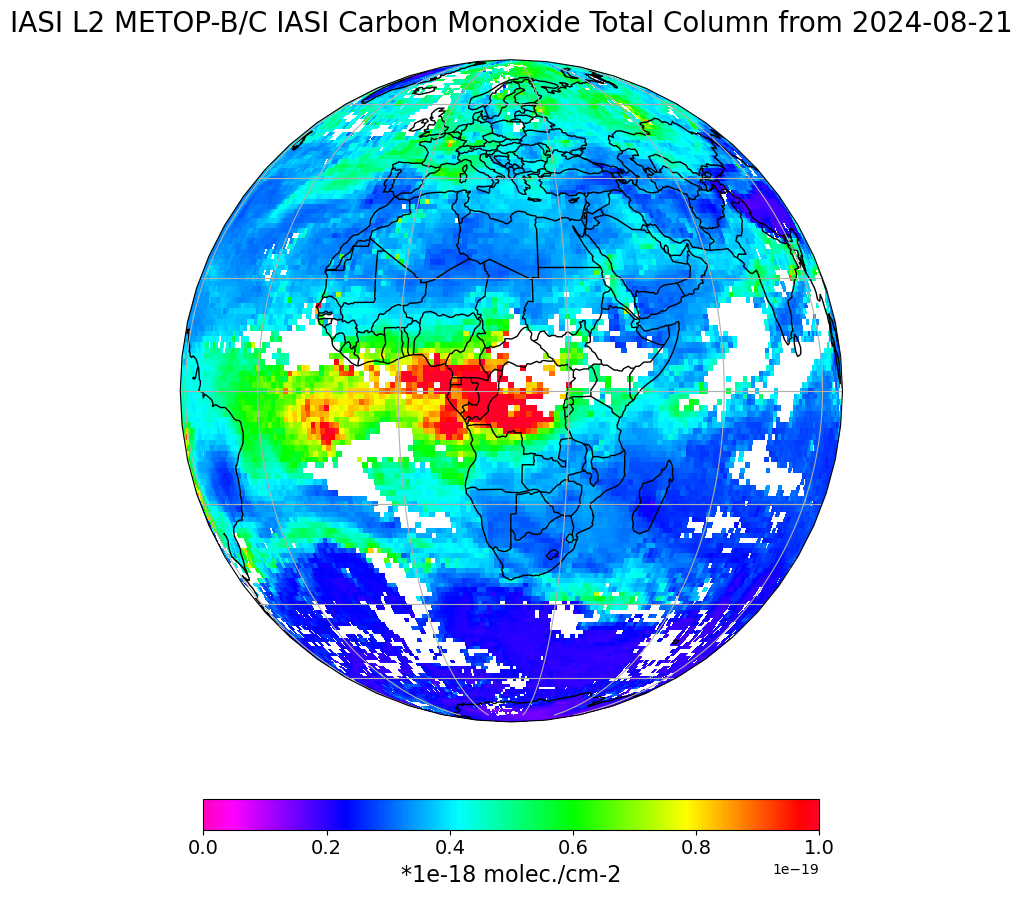

In [21]:
visualize_pcolormesh(data_array=xarray_ab*1e-18, 
                     longitude=xarray_ab.longitude, 
                     latitude=xarray_ab.latitude, 
                     projection=ccrs.Orthographic(20), 
                     color_scale='gist_rainbow_r', 
                     unit='*1e-18 ' + xarray_ab.units, 
                     long_name= "IASI L2 METOP-B/C " + xarray_ab.long_name + " from " + str(xarray_ab.time.data)[0:10], 
                     vmin=0, 
                     vmax=1e-19,
                     set_global=True
                    )

You can also visualize the interested geographical extent by specifying `set_global=False`, `projection=ccrs.PlateCarree()`  and `latmin`, `latmax`, `lonmin`, `lonmax`.

(<Figure size 2000x1000 with 2 Axes>,
 <GeoAxes: title={'center': 'IASI L2 METOP-B/C IASI Carbon Monoxide Total Column from 2024-08-21'}>)

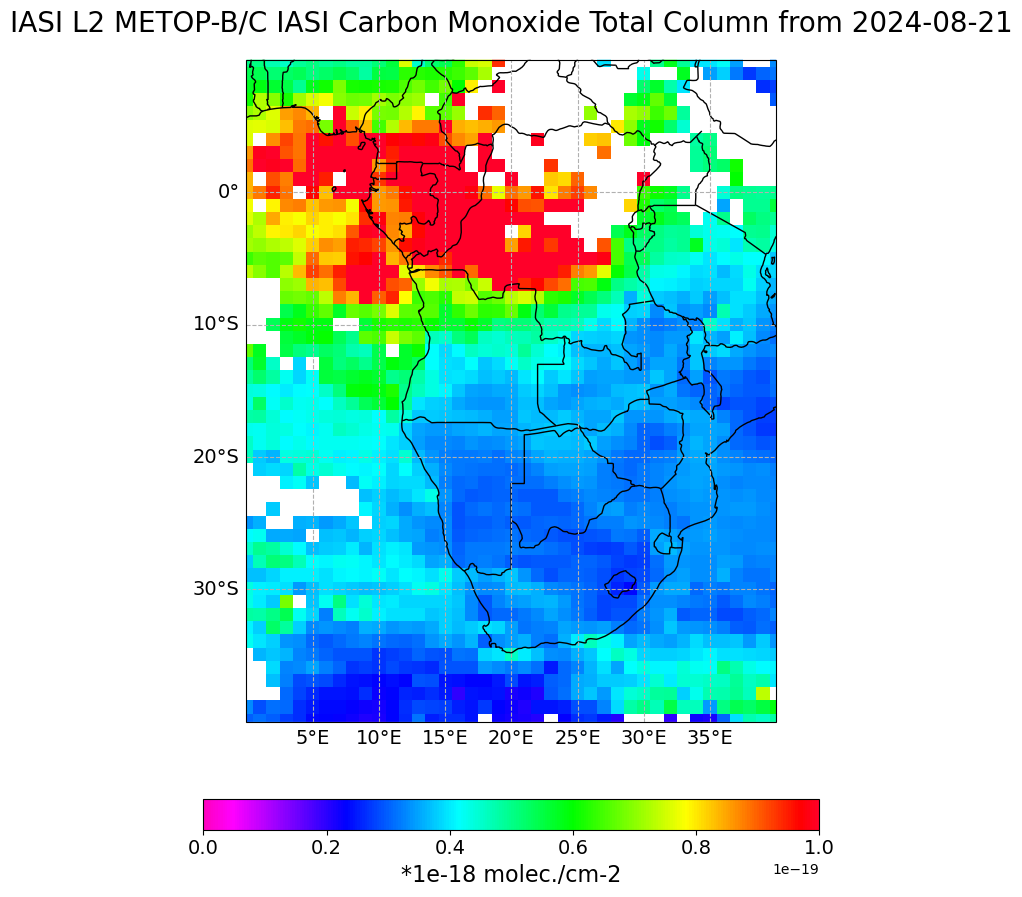

In [22]:
visualize_pcolormesh(data_array=xarray_ab*1e-18, 
                     longitude=xarray_ab.longitude, 
                     latitude=xarray_ab.latitude, 
                     projection=ccrs.PlateCarree(), 
                     color_scale='gist_rainbow_r', 
                     unit='*1e-18 ' + xarray_ab.units, 
                     long_name= "IASI L2 METOP-B/C " + xarray_ab.long_name + " from " + str(xarray_ab.time.data)[0:10], 
                     vmin=0, 
                     vmax=1e-19,
                     set_global=False,
                     lonmin=lonmin, 
                     lonmax=lonmax, 
                     latmin=latmin, 
                     latmax=latmax,
                    )

<br>

<hr>

### Resources
This notebook was adapted from: https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere/-/blob/master/20_data_exploration/232_Metop-AB_IASI_CO_L2_load_browse.ipynb?ref_type=heads

<hr>

<p><img src='../img/copernicus_logo.png' align='left' alt='Logo EU Copernicus' width='25%'></img></p>
<br clear=left>
<p style="text-align:left;">This project is licensed under the <a href="../LICENSE">MIT License</a> <span style="float:right;"><a href="https://gitlab.eumetsat.int/eumetlab/atmosphere/atmosphere">View on GitLab</a> | <a href="https://training.eumetsat.int/">EUMETSAT Training</a>